# COVID-19 Visualizations

**Data Source:** https://github.com/owid/covid-19-data/tree/master/public/data

A collection of the COVID-19 data maintained by 'Our World in Data'. It is updated daily and includes data on confirmed cases, deaths, hospitalizations, testing, and vaccinations as well as other variables of potential interest.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import calendar

#setting color theme
sns.set_palette('GnBu_r')

#importing data
df = pd.read_csv('../data/owid-covid-data.csv')

In [2]:
df.head(3)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [3]:
#counting missing values by column to drop columns with many NaN
columns_missingval = df.isna().sum().sort_values(ascending=False).rename_axis('columns').reset_index(name='counts')
columns_missingval.head(3)

,columns,counts
0,weekly_icu_admissions,83088
1,weekly_icu_admissions_per_million,83088
2,weekly_hosp_admissions,82589


In [4]:
#defining list to drop columns with missing values over 33 000
lst = columns_missingval.to_numpy()
to_drop = []

for i in range(len(lst)):
    if lst[i][1] > 33000:
        to_drop.append(lst[i][0])
        
#dropping columns and showing new data frame
df.drop(to_drop, axis=1, inplace=True)
df = df.set_index(['location'])
df.tail(3)

,iso_code,continent,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
location,,,,,,,,,,,,,,,,,,,,,
Zimbabwe,ZWE,Africa,2021-04-22,38018.0,38.0,85.143,1555.0,0.0,0.714,2557.908,...,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.571
Zimbabwe,ZWE,Africa,2021-04-23,38045.0,27.0,73.000,1556.0,1.0,0.714,2559.725,...,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.571
Zimbabwe,ZWE,Africa,2021-04-24,38064.0,19.0,52.143,1556.0,0.0,0.571,2561.003,...,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,1.7,61.49,0.571


In [5]:
#defining list of continents in dataframe
cont_lst = df['continent'].dropna().unique().tolist()
cont_lst

['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']

In [6]:
#data frame with continental data
df_cont = df.loc[['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']].reset_index()

In [7]:
'''
For automating previous step:

df_cont = df.loc[df['location'].isin(cont_lst)]
df_cont.reset_index(level=0, inplace=True)
df_cont

this code is not working properly
'''

"\nFor automating previous step:\n\ndf_cont = df.loc[df['location'].isin(cont_lst)]\ndf_cont.reset_index(level=0, inplace=True)\ndf_cont\n\nthis code is not working properly\n"

In [8]:
#defining columns with many missing values and dropping these
columns_missingval2 = df_cont.isna().sum().sort_values(ascending=False).rename_axis('columns').reset_index(name='counts')
lst2 = columns_missingval2.to_numpy()

to_drop2 = []

for i in range(len(lst2)):
    if lst2[i][1] > 140:
        to_drop2.append(lst2[i][0])

df_cont.drop(to_drop2, axis=1, inplace=True)

In [9]:
df_cont.head(3)

,location,iso_code,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,population
0,Asia,OWID_ASI,2020-01-22,556.0,0.0,NaN,17.0,0.0,NaN,0.120,0.000,NaN,0.004,0.000,NaN,4.639847e+09
1,Asia,OWID_ASI,2020-01-23,654.0,98.0,NaN,18.0,1.0,NaN,0.141,0.021,NaN,0.004,0.000,NaN,4.639847e+09
2,Asia,OWID_ASI,2020-01-24,937.0,283.0,NaN,26.0,8.0,NaN,0.202,0.061,NaN,0.006,0.002,NaN,4.639847e+09


In [10]:
#transformting the date column to datetime to plot monthly data
df_cont['time'] = pd.to_datetime(df_cont['date'], format='%Y-%m-%d')

#saving data frame to csv:
#df_cont.to_csv('dataplot1.csv')
df_cont.head(3)

,location,iso_code,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,population,time
0,Asia,OWID_ASI,2020-01-22,556.0,0.0,NaN,17.0,0.0,NaN,0.120,0.000,NaN,0.004,0.000,NaN,4.639847e+09,2020-01-22
1,Asia,OWID_ASI,2020-01-23,654.0,98.0,NaN,18.0,1.0,NaN,0.141,0.021,NaN,0.004,0.000,NaN,4.639847e+09,2020-01-23
2,Asia,OWID_ASI,2020-01-24,937.0,283.0,NaN,26.0,8.0,NaN,0.202,0.061,NaN,0.006,0.002,NaN,4.639847e+09,2020-01-24


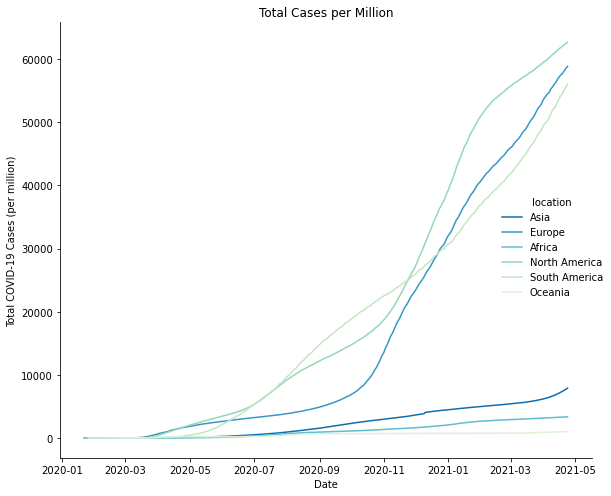

In [11]:
#plotting COVID-19 trend data
ax = sns.relplot(x='time', y="total_cases_per_million", kind='line', 
                 data=df_cont, hue = 'location', height = 7, aspect = 1)
ax.set(xlabel='Date', ylabel='Total COVID-19 Cases (per million)')
plt.title('Total Cases per Million')
plt.tight_layout()
plt.savefig('../figures/figure0.png', dpi=100)

In [12]:
#get latest confirmed COVID-19 cases
df['time'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df = df.reset_index()
recent_df = df[df['time'] == '2021-04-24']
recent_df = recent_df[['time', 'location', 'total_cases_per_million', 'gdp_per_capita']].dropna()

#picking sample to showcase in plot
sample = recent_df.sample(n=50)

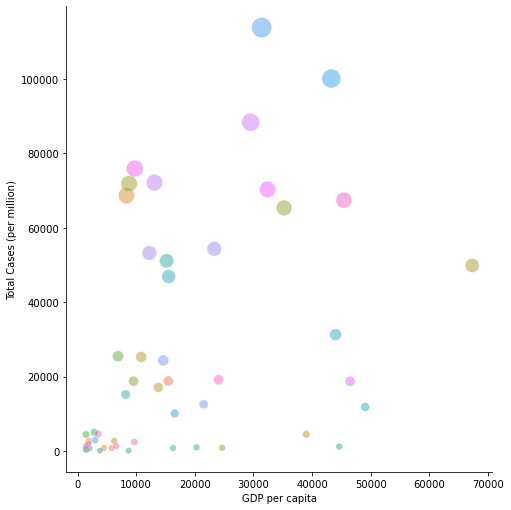

In [13]:
#plotting scatterplot total cases per million and GDP per captia
ax2 = sns.relplot(y="total_cases_per_million",
                    x= "gdp_per_capita",
                    hue = "location", sizes=(40, 400), alpha=.5, data =sample, height = 7, 
                  aspect = 1, size="total_cases_per_million", legend=False)
ax2.set(xlabel='GDP per capita', ylabel='Total Cases (per million)')

In [14]:
'''
Total cases and GDP per capita with hovering legends from plotly.express library:

fig = px.scatter(sample, y="total_cases_per_million",
                    x= "gdp_per_capita",
                    color= "location", hover_name="location",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='COVID-19: Total Cases and GDP per capita',
                    size="total_cases_per_million",
                    size_max = 30,
                    height =600,
                    )
fig.update_coloraxes(colorscale="hot")
fig.update(layout_coloraxis_showscale=False)
fig.update_yaxes(title_text="Total Cases (per million)")
fig.update_xaxes(title_text="GDP per capita")
#fig.show()
'''

'\nTotal cases and GDP per capita with hovering legends from plotly.express library:\n\nfig = px.scatter(sample, y="total_cases_per_million",\n                    x= "gdp_per_capita",\n                    color= "location", hover_name="location",\n                    color_continuous_scale=px.colors.sequential.Plasma,\n                    title=\'COVID-19: Total Cases and GDP per capita\',\n                    size="total_cases_per_million",\n                    size_max = 30,\n                    height =600,\n                    )\nfig.update_coloraxes(colorscale="hot")\nfig.update(layout_coloraxis_showscale=False)\nfig.update_yaxes(title_text="Total Cases (per million)")\nfig.update_xaxes(title_text="GDP per capita")\n#fig.show()\n'

**Barplot of highest death count by country (top 20)**

In [15]:
#complining dataset
total_deaths = df[df['time'] == '2021-04-24']
total_deaths = total_deaths[['date', 'location', 'continent', 'total_deaths_per_million']].dropna()
total_deaths = total_deaths.sort_values('total_deaths_per_million', ascending=False).head(30)
total_deaths.to_csv('dataplot2.csv')

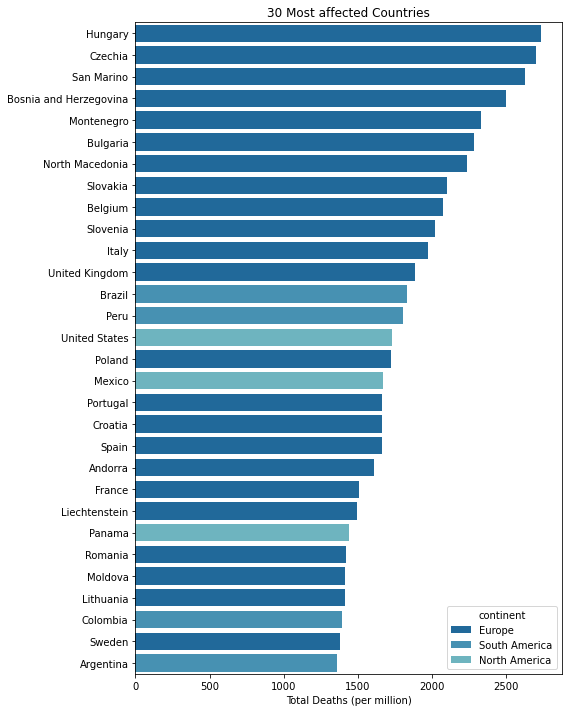

In [16]:
#horizontal barplots of 30 most affected countries by total deaths (per million)
f, ax = plt.subplots(figsize=(8, 10))
sns.barplot(x="total_deaths_per_million", y="location", data=total_deaths, 
            hue='continent', dodge=False).set_title('30 Most affected Countries')
ax.set(ylabel="", xlabel="Total Deaths (per million)")
plt.tight_layout()
plt.savefig('../figures/figure1.png', dpi=700)

**Monthly Data**

In [17]:
#getting monthly data frame
df['time'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['month'] = df['time'].dt.month
df['year'] =df['time'].dt.year

In [18]:
monthly_data = df.groupby(['month', 'year', 'location']).mean()
monthly_data = monthly_data[['new_cases', 'new_deaths', 'new_cases_per_million', 'new_deaths_per_million']]
monthly_data.head(5)

new_cases  new_deaths  new_cases_per_million  \
month year location                                                   
1     2020 Argentina         NaN         NaN                    NaN   
           Asia       933.300000        19.6               0.201100   
           Australia    1.500000         NaN               0.058833   
           Cambodia     0.200000         NaN               0.012000   
           Canada       0.666667         NaN               0.017500   

                      new_deaths_per_million  
month year location                           
1     2020 Argentina                     NaN  
           Asia                       0.0042  
           Australia                     NaN  
           Cambodia                      NaN  
           Canada                        NaN

In [19]:
#compiling monthly world data frame
monthly_data_world = df.groupby(['month', 'year']).mean()
monthly_data_world = monthly_data_world[['new_cases', 'new_deaths', 'new_cases_per_million', 'new_deaths_per_million']].reset_index()
monthly_data_world['monthyear'] = monthly_data_world.year.astype(str) + '-' + monthly_data_world.month.astype(str)
monthly_data_world.to_csv('dataplot3.csv')
monthly_data_world.head(3)

,month,year,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,monthyear
0,1,2020,148.798942,9.187500,0.077958,0.003156,2020-1
1,1,2021,10162.763051,229.837470,129.551862,2.604030,2021-1
2,2,2020,202.427056,23.941691,0.273534,0.012937,2020-2


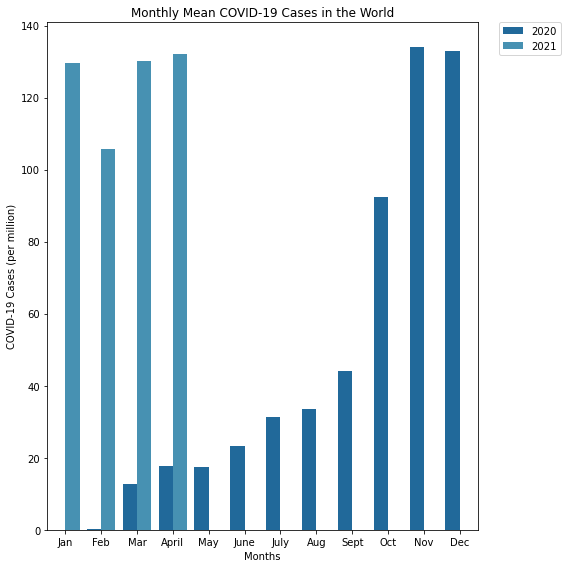

In [20]:
#plotting monthly mean covid-19 cases in the world
f, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x='month', y='new_cases_per_million', data = monthly_data_world, 
            hue ='year').set_title('Monthly Mean COVID-19 Cases in the World')
ax.set(ylabel="COVID-19 Cases (per million)", xlabel="Months")
ax.set(xticklabels=['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.savefig('../figures/figure2.png', dpi=700)

**Relationships**

In [75]:
#compiling data frame to make scatterplots
reldf = df[df['time'] == '2021-04-24']
reldf = reldf[['time', 'location', 'continent', 'total_deaths_per_million', 'total_cases_per_million', 
               'gdp_per_capita', 'median_age', 'aged_65_older', 'aged_70_older', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'hospital_beds_per_thousand', 'life_expectancy',
       'human_development_index']].dropna()
#reldf.to_csv('scatterplotdata.csv')
reldf.head(3)

,time,location,continent,total_deaths_per_million,total_cases_per_million,gdp_per_capita,median_age,aged_65_older,aged_70_older,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
1287,2021-04-24,Albania,Europe,824.241,45315.519,11803.431,38.0,13.188,8.643,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795
1712,2021-04-24,Algeria,Africa,72.929,2753.321,13913.839,29.1,6.211,3.857,0.5,278.364,6.73,0.7,30.4,1.90,76.88,0.748
3488,2021-04-24,Argentina,South America,1360.171,62967.653,18933.907,31.9,11.198,7.441,0.6,191.032,5.50,16.2,27.7,5.00,76.67,0.845


In [22]:
#creating list to make several subplots
lst = ['gdp_per_capita', 'median_age', 'aged_65_older', 'aged_70_older', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'hospital_beds_per_thousand', 'life_expectancy',
       'human_development_index']

len(lst)

12

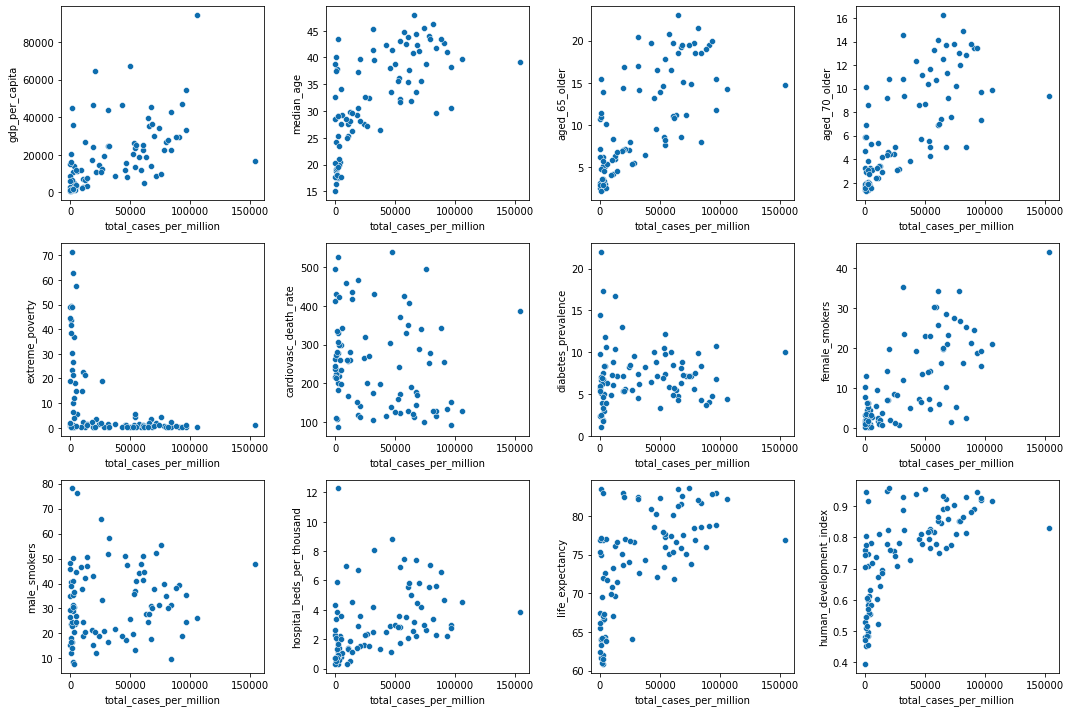

In [23]:
#creating plots in subplots with for loop for total_cases_per_million
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
counter = 0

for i in range(3):
    for g in range(4):
        if counter==12:
            break
        else:
            sns.scatterplot(x='total_cases_per_million', y=lst[counter], data=reldf, ax=axes[i, g])
            counter += 1

plt.tight_layout()
plt.savefig('../figures/figure3.png', dpi=700)

In [24]:
'''
Code if subplots less than defined grid:

fig, axes = plt.subplots(3, 4, figsize=(15, 10))
counter = 0

for i in range(3):
    for g in range(4):
        if counter==11:
            break
        else:
            sns.scatterplot(x='total_deaths_per_million', y=lst[counter], data=reldf, ax=axes[i, g])
            counter += 1
'''

"\nCode if subplots less than defined grid:\n\nfig, axes = plt.subplots(3, 4, figsize=(15, 10))\ncounter = 0\n\nfor i in range(3):\n    for g in range(4):\n        if counter==11:\n            break\n        else:\n            sns.scatterplot(x='total_deaths_per_million', y=lst[counter], data=reldf, ax=axes[i, g])\n            counter += 1\n"

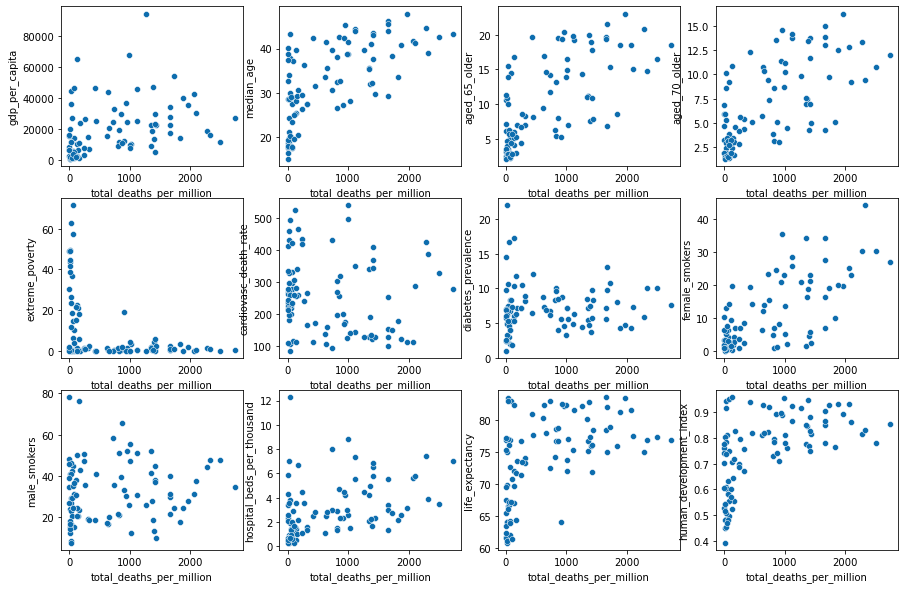

In [25]:
#creating plots in subplots with for loop for total_deaths_per_million
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
counter = 0

for i in range(3):
    for g in range(4):
        if counter==12:
            break
        else:
            sns.scatterplot(x='total_deaths_per_million', y=lst[counter], data=reldf, ax=axes[i, g])
            counter += 1

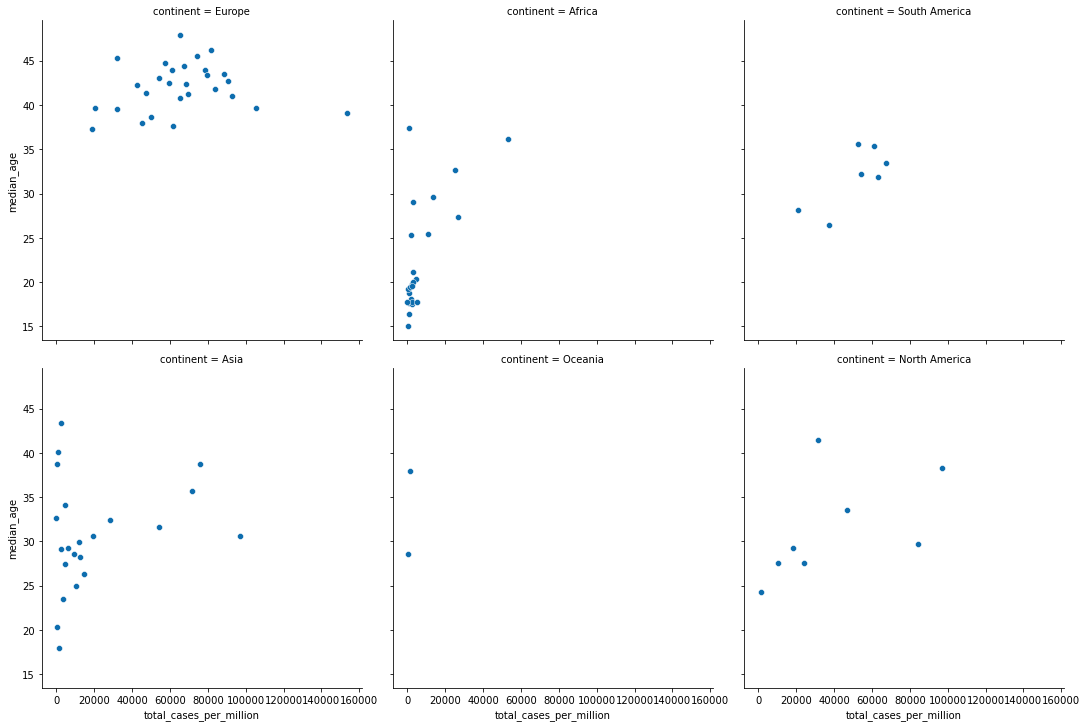

In [26]:
#showcasing relationships by continent for median_age
sns.relplot(x='total_cases_per_million', y='median_age', kind='scatter', data=reldf, col='continent', col_wrap=3)

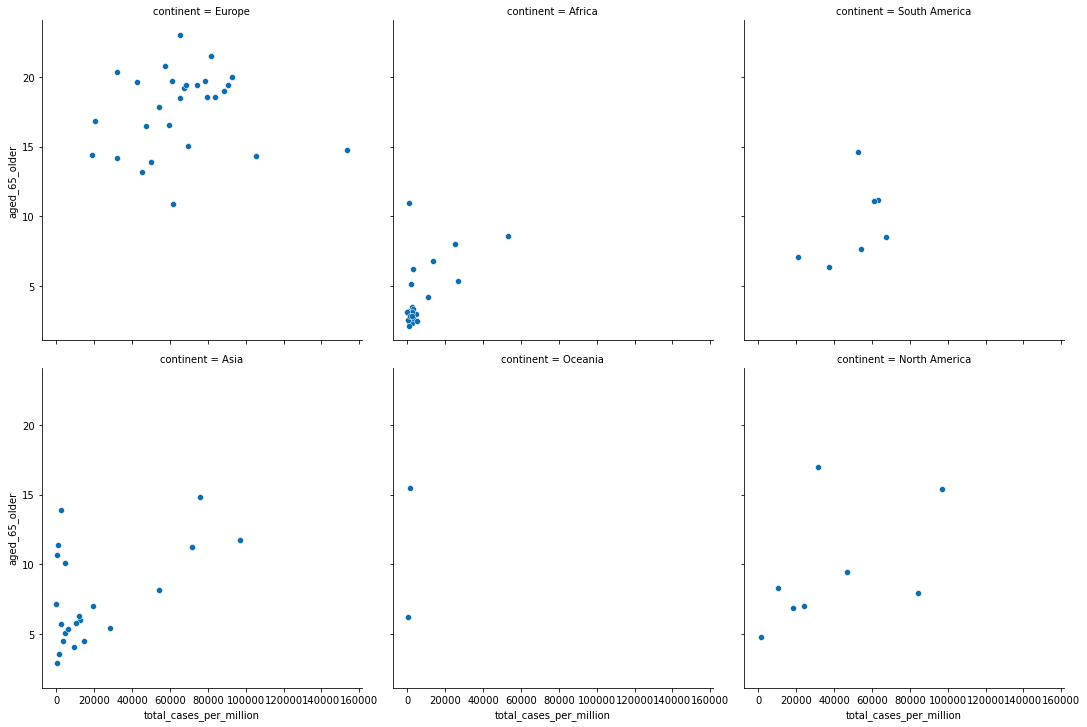

In [27]:
#showcasing relationships by continent for aged_65_older
sns.relplot(x='total_cases_per_million', y='aged_65_older', kind='scatter', data=reldf, col='continent', col_wrap=3)

# Multiple Linear Regression Model

In [28]:
#libraries for regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

**The Distribution of the Data**

<AxesSubplot:xlabel='total_cases_per_million'>

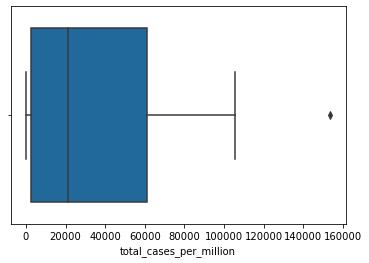

In [38]:
sns.boxplot(x ='total_cases_per_million', data = reldf)

**Defining x and y**

In [62]:
reldf.reset_index()

x = reldf.drop(['time', 'location', 'continent', 'total_deaths_per_million', 'total_cases_per_million'], axis=1).values
y = reldf['total_cases_per_million'].values

In [78]:
reldf

,time,location,continent,total_deaths_per_million,total_cases_per_million,gdp_per_capita,median_age,aged_65_older,aged_70_older,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
1287,2021-04-24,Albania,Europe,824.241,45315.519,11803.431,38.0,13.188,8.643,1.1,304.195,10.08,7.1,51.2,2.89,78.57,0.795
1712,2021-04-24,Algeria,Africa,72.929,2753.321,13913.839,29.1,6.211,3.857,0.5,278.364,6.73,0.7,30.4,1.90,76.88,0.748
3488,2021-04-24,Argentina,South America,1360.171,62967.653,18933.907,31.9,11.198,7.441,0.6,191.032,5.50,16.2,27.7,5.00,76.67,0.845
3908,2021-04-24,Armenia,Asia,1350.214,71839.753,8787.580,35.7,11.232,7.571,1.8,341.010,7.11,1.5,52.1,4.20,75.09,0.776
4849,2021-04-24,Australia,Oceania,35.686,1163.260,44648.710,37.9,15.504,10.129,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80366,2021-04-24,Uruguay,South America,657.219,52487.141,20551.409,35.6,14.655,10.361,0.1,160.708,6.93,14.0,19.9,2.80,77.91,0.817
82218,2021-04-24,Vietnam,Asia,0.360,29.105,6171.884,32.6,7.150,4.718,2.0,245.465,6.00,1.0,45.9,2.60,75.40,0.704
83057,2021-04-24,Yemen,Asia,39.395,204.687,1479.147,20.3,2.922,1.583,18.8,495.003,5.35,7.6,29.2,0.70,66.12,0.470
83460,2021-04-24,Zambia,Africa,67.722,4967.212,3689.251,17.7,2.480,1.542,57.5,234.499,3.94,3.1,24.7,2.00,63.89,0.584


**Splitting Data into training and test set**

In [63]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=0)

In [64]:
#scaling the x values
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scale = scaler.transform(x_train)
x_test_scale = scaler.transform(x_test)

'\n#scaling the x values\nscaler = StandardScaler()\nscaler.fit(x_train)\nx_train_scale = scaler.transform(x_train)\nx_test_scale = scaler.transform(x_test)\n'

In [65]:
ml = LinearRegression()
ml.fit(x_train_scale, y_train)

LinearRegression()

In [66]:
y_pred = ml.predict(x_test_scale)

In [76]:
ml.predict(scaler.transform([[11803.431, 38.0, 13.188, 8.643, 1.1, 304.195, 10.08, 7.1, 51.2, 2.89, 78.57, 0.795]]))

array([33526.71307298])

**Test R-squared**

In [68]:
r2_score(y_test, y_pred)

0.5264841587781539

**Visualizing the predicted results**

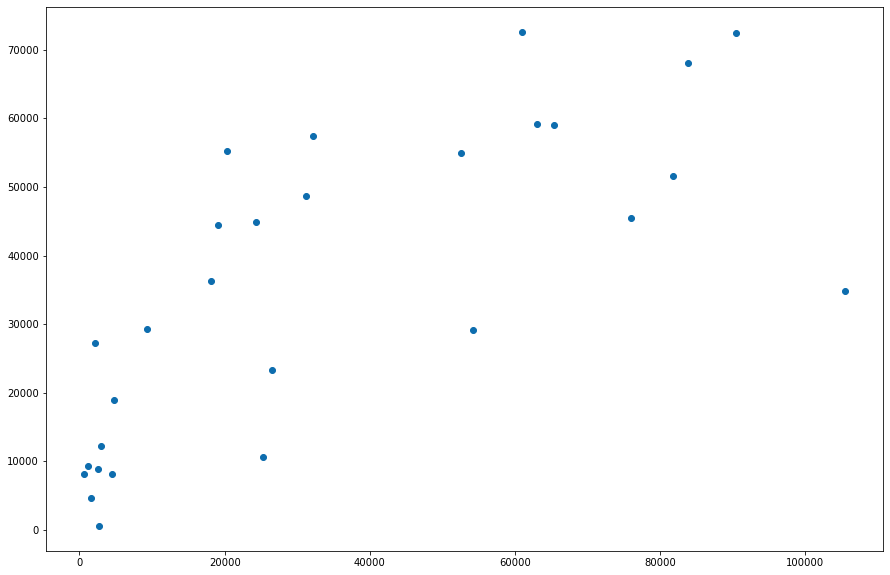

In [69]:
plt.figure(figsize = (15,10))
plt.scatter(y_test, y_pred)

**Heatmap of the Correlation of the Variables**

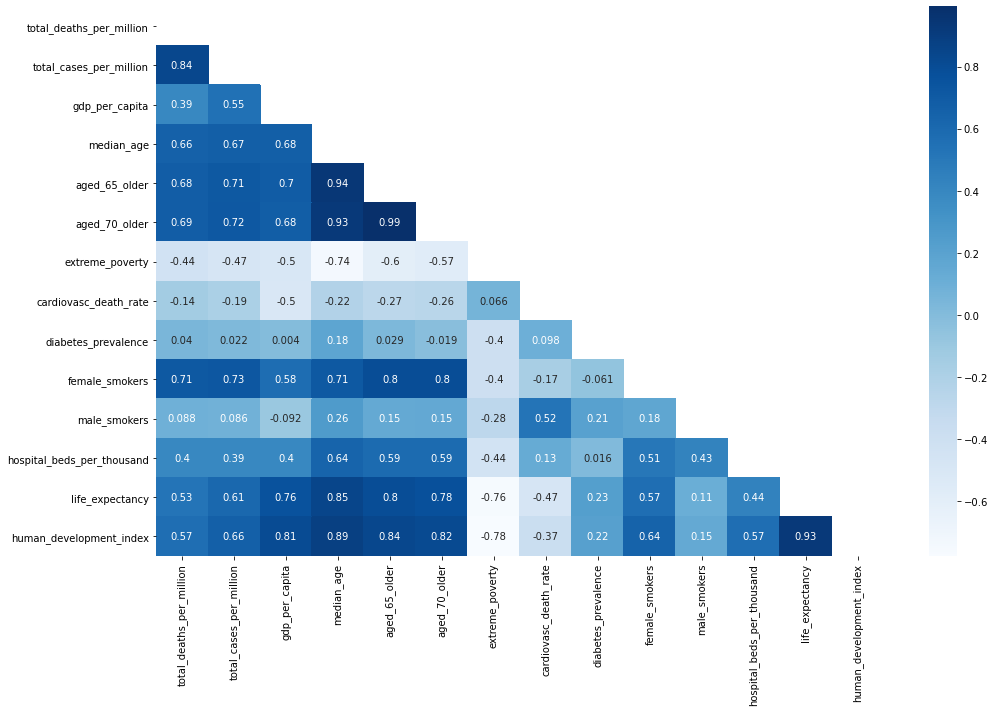

In [70]:
corr = reldf.corr()
plt.figure(figsize = (15,10))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, mask=mask, cmap="Blues")
plt.tight_layout()
plt.savefig('../figures/figure4.png', dpi=700)